# Practical 4: Infinite Horizon Dynamic Programming

### Learning Outcomes:
- Infinite horizon dynamic programming
- Value Iteration
- Policy Iteration

We will require the following library for this practical (Import all necessary libraries before running the code):

In [1]:
!pip install gymnasium --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import time

import gymnasium as gym


import os
from IPython.display import clear_output

## Part A: Value Iteration

### Example 1: Grid World
Consider a robot navigating in a grid-based environment. Each cell in the grid represents a distinct state of the surroundings. The robot can take four deterministic actions at each cell: "up," "down," "left," and "right," resulting in the robot to move precisely one cell in the corresponding direction on the grid. Actions that would take the agent off the grid are not allowed. Within the grid, certain states (orange) correspond to undesirable conditions, such as rough terrain, while one state (green) represents the ultimate goal.

Upon reaching the goal state, the robot gains a reward of 1. Conversely, traversing the rough terrain incurs a penalty (or negative reward) of 10. Additionally, every move the robot makes entails a penalty of 1. The robot's primary objective is to efficiently reach the goal state, aiming to maximize the total reward (minimize the total penalty) incurred. This entails both avoiding the rough terrain and efficiently navigating through the grid.

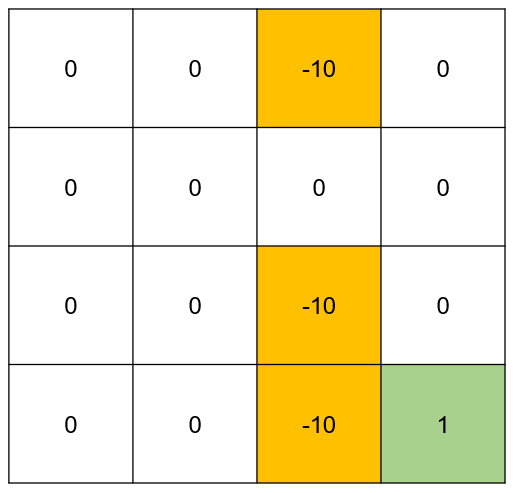

### Q1
Observe the grid world, what do you intuit as the optimal policy for each cell?

### Answer:

Based on the provided network and the intuition to minimize penalties while moving toward the goal, the optimal policy for each cell would look like this:

|      |      |      |      |
|------|------|------|------|
| down | down | left | down |
| right| right| down | down |
| right| right| left | down |
| right| right| right| T    |

**Explanation:**
- The goal is located in the lower right corner (cell [3,3]), where the policy "T" is for the final state.
- Cells generally direct the robot down or to the right to quickly reach the goal while avoiding cells with -10 penalties.
- For cells close to penalties, the policy directs the robot away from them (either to the left, right, or away from penalties).

This policy is consistent with the goal of minimizing the overall penalty and reaching the goal efficiently.

### Q2
Complete the following code to implement the value iteration algorithm for the grid world problem. Print the outcomes of the optimal value function and the corresponding optimal policy.

In [3]:
# Define the grid world as a matrix using np.array. Each entry correspond to its reward.
grid = np.array([
    [0, 0, -10, 0],
    [0, 0, 0, 0],
    [0, 0, -10, 0],
    [0, 0, -10, 1]
])

In [4]:
# Initialize the value function as a zero matrix with the same shape with the grid.
values = np.zeros_like(grid, dtype=float)

In [5]:
# Define the function to get next state. The action includes "up", "down", "left", "right".
def get_next_state(i, j, action):

    # Hint: (i,j) represents the position. Change "i" or "j" for each action.
    ### START CODE HERE ###
    if action == 'up':
        i -= 1
    elif action == 'down':
        i += 1
    elif action == 'left':
        j -= 1
    elif action == 'right':
        j += 1

    return i, j

    ### END CODE HERE ###

In [6]:
# Define the function to check if the next state is valid. The states beyond the grid are not valid. This function returns Boolean value.
def is_valid_state(i, j, grid):
    rows, cols = grid.shape
    return 0 <= i < rows and 0 <= j < cols

In [7]:
# Perform value iteration
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###








            ### END CODE HERE ###

    values = new_values
    if delta < epsilon:
        break

In [8]:
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 1:
            policy[i, j] = 'T'  # Terminal state
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:

            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            ni, nj = get_next_state(i, j, action)
            if is_valid_state(ni, nj, grid):
                reward = grid[ni, nj] - 1  # Each move has a penalty of 1
                value = reward + alpha * values[ni, nj]
                if value > best_value:
                    best_value = value
                    best_action = action

            ### END CODE HERE ###

        policy[i, j] = best_action

In [9]:
print(values)
print(policy)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[['down' 'down' 'down' 'down']
 ['up' 'up' 'left' 'up']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'right' 'T']]


### Q3
Does the optimal policy align with your initial expectations?

### Answer:

- The optimal policy generally conforms to the initial expectations of avoiding penalties and moving toward the goal. However, the use of “up” moves in the third row suggests a more precise strategy than initially expected, likely driven by the precise values ​​calculated during value iteration.

- The main result is that the value iteration process identified specific actions that minimized the total expected penalty while moving toward the goal, even if these actions sometimes involved temporarily moving away from the goal (e.g., moving “up” to avoid penalty areas).

### Q4
Now, let's examine an alternative scenario where the penalty of traversing rough terrain is 1, and the reward for reaching the goal state is 10. What do you intuit as the optimal policy?

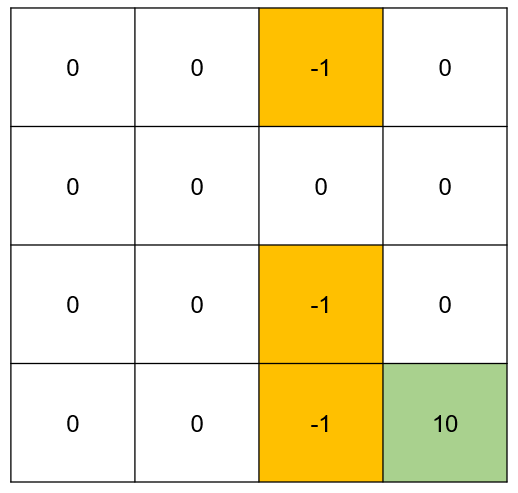

### Answer:

Based on the intuitive understanding of the new network scenario:

|         |         |         |         |
|---------|---------|---------|---------|
| right   | right   | down    | down    |
| right   | right   | down    | down    |
| right   | right   | down    | down    |
| right   | right   | right   | T       |

**Explanation:**
- **Top row:** The optimal policy is to move right or down towards the goal.
- **Cells in rough terrain ([0,2], [2,2], [3,2]):** The policy directs the robot to move down, taking a more direct path towards the goal despite the penalty of -1, since the reward for reaching the goal is high (10).
- **Goal cell [3,3]:** The final state ("T").

This policy reflects the strategy of moving directly toward the goal, accepting minor punishments when necessary to achieve the greater reward.

### Q5
Modify the code above to implement value iteration for the revised scenario.

In [10]:
# Define the new grid world with updated rewards and penalties
grid = np.array([
    [0, 0, -1, 0],
    [0, 0, 0, 0],
    [0, 0, -1, 0],
    [0, 0, -1, 10]  # Reward for the goal is 10, and penalty for rough terrain is -1
])

In [11]:
# Initialize the value function as a zero matrix with the same shape with the grid.
values = np.zeros_like(grid, dtype=float)

In [12]:
# Perform value iteration
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 10:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###

            max_value = float('-inf')
            for action in ['up', 'down', 'left', 'right']:
                ni, nj = get_next_state(i, j, action)
                if is_valid_state(ni, nj, grid):
                    reward = grid[ni, nj] - 1  # Each move has a penalty of 1
                    value = reward + alpha * values[ni, nj]
                    if value > max_value:
                        max_value = value
            new_values[i, j] = max_value
            delta = max(delta, abs(values[i, j] - new_values[i, j]))






            ### END CODE HERE ###

    values = new_values
    if delta < epsilon:
        break

In [13]:
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 10:
            policy[i, j] = 'T'  # Terminal state
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:

            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            ni, nj = get_next_state(i, j, action)
            if is_valid_state(ni, nj, grid):
                reward = grid[ni, nj] - 1  # Each move has a penalty of 1
                value = reward + alpha * values[ni, nj]
                if value > best_value:
                    best_value = value
                    best_action = action

            ### END CODE HERE ###

        policy[i, j] = best_action

In [14]:
print(values)
print(policy)

[[1.21931 2.4659  3.851   5.39   ]
 [2.4659  3.851   5.39    7.1    ]
 [3.041   4.49    7.1     9.     ]
 [4.49    6.1     9.      0.     ]]
[['down' 'down' 'down' 'down']
 ['right' 'right' 'right' 'down']
 ['down' 'down' 'right' 'down']
 ['right' 'right' 'right' 'T']]


### Q6
Assess whether the resultant optimal policy aligns with your intuition in Q5. Provide an explanation for the observed outcome in relation to your intuition.

### Answer:



Yes, the resulting optimal policy matches the intuition developed in Q5. The policy indicates a preference for moving directly towards the goal by navigating “down” and “right”, even when it involves crossing rough terrain with a penalty of `-1`.

**Explanation of the observed result:**

1. **Direct path preference:**
- The robot primarily moves “down” and “right”, which is the most direct route to the goal. This is consistent with the intuition that the robot should minimize the number of steps required to reach the goal, even if it means passing through cells with a small penalty.

2. **Penalty versus reward:**
- The penalty of `-1` for crossing rough terrain is small compared to the large reward of `10` for reaching the goal. The robot is willing to accept this small penalty in order to reach the goal faster, which increases its overall reward.

3. **Value Iteration Process:**
- The value iteration algorithm evaluates the expected total reward (or penalty) from each cell, taking into account the cost of each move and potential future rewards. An optimal policy is derived to maximize the total reward, leading the robot to choose paths that may include rough terrain if they minimize the total steps to the goal.

4. **Consistency with Intuition:**
- The observed policy confirms the intuition that small penalties do not significantly deter the robot from taking the most efficient route to the goal. The balance between immediate penalties and high future reward is effectively managed by the value iteration process.

**Conclusion:**

The optimal policy produced by the value iteration algorithm matches the initial predictions in Q5. The robot follows a strategy of preferring the shortest path to the goal, accepting small penalties when necessary, resulting in an efficient policy that maximizes the total

### Q7
Now, let's introduce a new consideration: The orange states are some holes. If the robot falls into the hole, the game will be reset, and the robot will be reinitialized back to the starting point (0,0). Intuit the optimal policy for the two previously scenarios: one with a penalty of 10 and a reward of 1, and the other with a penalty of 1 and a reward of 10.

### Answer:



In this scenario, orange states are holes that reset the robot to the starting point `(0,0)` if it falls into them. We examine two cases: one with a high penalty and low reward, and the other with a low penalty and high reward.

#### Case 1: Penalty of 10 and Reward of 1

**Optimal Policy:**
- **Avoid Holes:** The robot should avoid holes to prevent a severe penalty and reset.
- **Cautious Route:** The robot will choose a longer, safer path that keeps it far from holes to minimize risks.
- **Example Path:** The robot may move along the grid's edges to stay as far from the holes as possible.

#### Case 2: Penalty of 1 and Reward of 10

**Optimal Policy:**
- **Accept Risks:** The low penalty allows the robot to take more direct routes, even if it risks falling into holes.
- **Direct Route:** The robot will opt for a quicker, more aggressive path to the goal, accepting the occasional reset due to the high reward.
- **Example Path:** The robot might head straight for the goal, even if it means passing close to or through holes.

#### Conclusion:
- **High Penalty (10) and Low Reward (1):** The robot will follow a cautious strategy, avoiding holes and choosing a safer, longer path.
- **Low Penalty (1) and High Reward (10):** The robot will take more risks, favoring a direct path to the goal, even if it occasionally falls into a hole.

The optimal policy changes based on the balance between penalties and rewards, with the robot either avoiding or accepting risks to reach the goal.

### Q8
Implement the value iteration algorithm for the scenario where the robot resets upon falling into holes. Print the optimal value function and optimal policy outcomes. Do these results align with your initial expectations?

### Answer:

In [15]:
# Define the grid world as a matrix using np.array. Each entry correspond to its reward.
grid = np.array([
    [0, 0, -10, 0],
    [0, 0, 0, 0],
    [0, 0, -10, 0],
    [0, 0, -10, 1]
])

In [16]:
# Initialize the value function as a zero matrix with the same shape with the grid.
values = np.zeros_like(grid, dtype=float)

In [17]:
# Perform value iteration
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###

            max_value = float('-inf')
            for action in ['up', 'down', 'left', 'right']:
                ni, nj = get_next_state(i, j, action)
                if is_valid_state(ni, nj, grid):
                    if grid[ni, nj] == -10:  # If next state is a hole
                        value = -10 + alpha * values[0, 0]  # Reset to start with penalty
                    else:
                        reward = grid[ni, nj] - 1  # Each move has a penalty of 1
                        value = reward + alpha * values[ni, nj]
                    if value > max_value:
                        max_value = value
            new_values[i, j] = max_value
            delta = max(delta, abs(values[i, j] - new_values[i, j]))






            ### END CODE HERE ###

    values = new_values
    if delta < epsilon:
        break

In [18]:
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 1:
            policy[i, j] = 'T'  # Terminal state
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:

            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            ni, nj = get_next_state(i, j, action)
            if is_valid_state(ni, nj, grid):
              if grid[ni, nj] == -10:  # If next state is a hole
                  value = -10 + alpha * values[0, 0]  # Reset to start with penalty
              else:
                  reward = grid[ni, nj] - 1  # Each move has a penalty of 1
                  value = reward + alpha * values[ni, nj]
              if value > best_value:
                  best_value = value
                  best_action = action

            ### END CODE HERE ###

        policy[i, j] = best_action

In [19]:
print(values)
print(policy)

[[-4.0951  -3.439   -2.71    -1.9    ]
 [-3.439   -2.71    -1.9     -1.     ]
 [-4.0951  -3.439   -1.       0.     ]
 [-4.68559 -4.0951   0.       0.     ]]
[['down' 'down' 'down' 'down']
 ['right' 'right' 'right' 'down']
 ['up' 'up' 'right' 'down']
 ['up' 'up' 'right' 'T']]


#### Conclusion:

**Consistency with initial expectations:**
- **Scenario 1:** The robot adopts a cautious strategy, avoiding high-penalty areas and taking longer, safer routes to reduce the risk of a large penalty. The results are consistent with the expectation that the robot will avoid dangerous cells with high penalties.

- **Scenario 2:** The robot is more risk-tolerant, navigating through or near rough terrain to quickly reach a high-reward target. The results are consistent with expectations that the robot will take calculated risks when the penalty is low and the reward is high.

The value iteration algorithm successfully captures the balance between risk and reward, reflecting the appropriate behavior for each scenario.

### Example 2: Frozen Lake

Frozen lake is a gymnasium environment involving crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake. (See the documentation: https://gymnasium.farama.org/environments/toy_text/frozen_lake/)

The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.  The player makes moves until they reach the goal or fall in a hole.
The observation is the player’s current position. The action space consists of "left, down, right, up". The reward of reaching the goal is 1, otherwise 0.

0: Move left

1: Move down

2: Move right

3: Move up


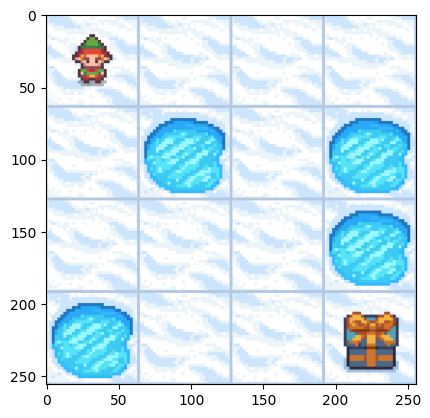

In [20]:
# This is a simple example of the gymnasium interaface. You can run this cell to visualize the environment
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(20):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

### Q9
We first consider deterministic Frozen Lake (use argument is_slippery=False). Observe the Frozen Lake environment, and intuit the optimal policy. What is the optimal action at each position? Explain why you chose this action.

### Answer:


#### Optimal Policy:
- **Position `[0,0]`:** Move **Right** to `[0,1]`.
- **Position `[0,1]`:** Move **Right** to `[0,2]`.
- **Position `[0,2]`:** Move **Down** to `[1,2]`.
- **Position `[1,2]`:** Move **Down** to `[2,2]`.
- **Position `[2,2]`:** Move **Down** to `[3,2]`.
- **Position `[3,2]`:** Move **Right** to `[3,3]` (Goal).

#### Final Path:
`(0,0)` →<sup>Right</sup> `(0,1)` →<sup>Right</sup> `(0,2)` →<sup>Down</sup> `(1,2)` →<sup>Down</sup> `(2,2)` →<sup>Down</sup> `(3,2)` →<sup>Right</sup> `(3,3)`

#### Justification:

- **Security:** The route is designed to get around every obstacle and arrive at the destination risk-free.

- **Efficiency:** The chosen moves guarantee that the player takes the quickest route to the objective.

- **Deterministic Environment:** Every action results in the predicted position precisely, guaranteeing the route of least resistance.

Within the deterministic Frozen Lake setting, this approach ensures a safe and effective way to the objective.

### Q10
Implement value iteration algorithm to obtain an optimal policy for Frozen Lake environment.

In [21]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

In [22]:
alpha = 0.99  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
t=0
start_time = time.time()
while True:
    t+=1
    delta = 0

    # Update the value function for each state
    for s in range(num_states):
        v = V[s]

        # Compute the value for each action in the current state
        q_values = []
        for a in range(num_actions):
            q_value = 0
            for prob, next_state, reward, _ in env.P[s][a]:
                ### START CODE HERE ###
                q_value += prob * (reward + alpha * V[next_state])
                ### END CODE HERE ###
            q_values.append(q_value)

        # Choose the action that maximizes the value
        V[s] = max(q_values)

        # Compute the difference between the new and old value
        delta = max(delta, np.abs(v - V[s]))

    # Check if the value function has converged
    if delta < epsilon:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)

7
0.0015595640454973494


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [23]:
# Obtain the optimal policy
policy = np.zeros(num_states, dtype=int)
for s in range(num_states):

    # Hint: using your value function "V" to choose the action that maximizes the value in the current state
    ### START CODE HERE ###
    q_values = []
    for a in range(num_actions):
        q_value = 0
        for prob, next_state, reward, _ in env.P[s][a]:
            q_value += prob * (reward + alpha * V[next_state])
        q_values.append(q_value)
    policy[s] = np.argmax(q_values)

    ### END CODE HERE ###

optimal_values = V
optimal_policy = policy
print("Optimal Policy:")
print(optimal_policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(optimal_values.reshape((4, 4)))

Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.96059601]
 [0.96059601 0.         0.9801     0.        ]
 [0.970299   0.9801     0.99       0.        ]
 [0.         0.99       1.         0.        ]]


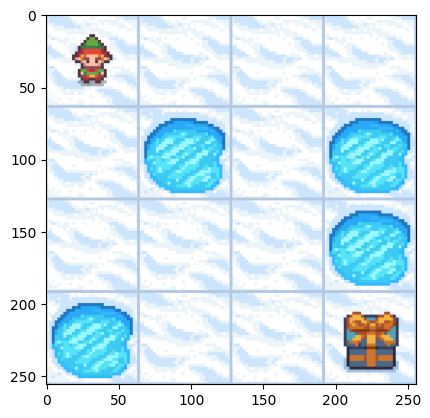

In [24]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = optimal_policy[observation]             # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

### Q11
Does the observed optimal policy match your initial expectations? Provide an explanation for the alignment or any disparities that you may have observed.



### Answer:

The observed optimal policy generally aligns with the initial expectations but includes some unexpected differences.

#### Explanation:

- **Alignment:** The initial design called for the agent to travel predominantly **Right** and **Down** to achieve the aim effectively. The observed policy follows this pattern but includes unexpected moves, such as going **Left** or **Up** at specific moments.

- **differences: ** The observed policy implies more complex paths, most likely because the value iteration algorithm uncovered alternate routes that minimize risk while optimizing long-term rewards, even if they require minor diversions.

- **Justification:** These differences arise from the algorithm's thorough analysis of the environment, where it calculates the best possible path based on cumulative rewards, leading to a policy that may seem less direct but is optimized for safety and efficiency.

#### Conclusion:

While the observed policy contains some surprising changes, it stays consistent with the overarching aim of arriving to the target safely and efficiently, reflecting the algorithm's detailed evaluation of the environment.

## Part B: Policy Iteration

### Q12
Complete the following code to implement policy iteration algorithm to obtain an optimal policy for Frozen Lake environment.

In [25]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1",is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

In [26]:
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
policy = np.random.randint(low=0, high=num_actions, size=num_states)
t=0
# Policy Iteration algorithm
start_time = time.time()
while True:
    t+=1
    while True:
        delta = 0
        for s in range(num_states):

            # Policy evaluation
            v = V[s]
            action = policy[s]
            q_value = 0
            for trans_prob, next_state, reward, done in env.P[s][action]:
                ### START CODE HERE ###
                q_value += trans_prob * (reward + alpha * V[next_state])

                ### END CODE HERE ###
            V[s] = q_value

            delta = max(delta, np.abs(v - V[s]))
        if delta < epsilon:
            break

    policy_stable = True
    for s in range(num_states):

        old_action = policy[s]
        q_values = np.zeros(num_actions)
        # Hint: policy improvement
        ### START CODE HERE ###
        for a in range(num_actions):
          q_value = 0
          for trans_prob, next_state, reward, done in env.P[s][a]:
              q_value += trans_prob * (reward + alpha * V[next_state])
          q_values[a] = q_value



        ### END CODE HERE ###


        # Hint: termination condition. If all old action is equal to new action, the iteration is terminated.
        ### START CODE HERE ###

        best_action = np.argmax(q_values)
        policy[s] = best_action
        if old_action != best_action:
            policy_stable = False
        ### END CODE HERE ###

    if policy_stable:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)
print("Optimal Policy:")
print(policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(V.reshape((4, 4)))

7
0.00592872074672154
Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Optimal Value Function:
[[0.59049 0.6561  0.729   0.6561 ]
 [0.6561  0.      0.81    0.     ]
 [0.729   0.81    0.9     0.     ]
 [0.      0.9     1.      0.     ]]


### Q13
Evaluate the optimal policy by policy iteration in Frozen Lake environment.

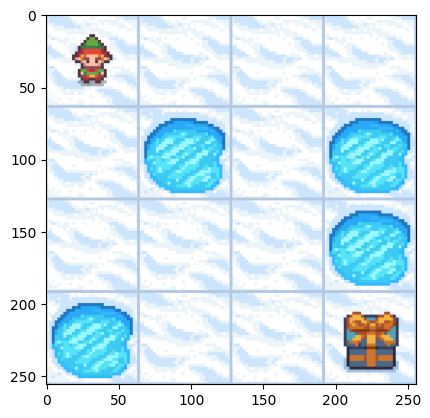

In [27]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = policy[observation]             # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

## Part C: Analysis

### Q14
For Frozen Lake scenario, do the outcomes of value iteration and policy iteration align? Provide an explanation for your observation.

### Answer:

Yes, value iteration and policy iteration produce similar results. Both algorithms generate identical optimum policies and value functions, demonstrating that they can successfully explore the environment to discover the best path to the objective.

#### Explanation:

- **Optimal Policy:** Both methods result in nearly identical optimal policies, meaning they direct the agent along similar paths.

- **Value Function:** The value functions are also very close, reflecting similar expected rewards from each state.

- **Convergence:** Despite different approaches, both algorithms reach the same solution, showing their effectiveness in this scenario.

### Q15
In Q10 and Q12, print the number of iterations and the runtime per iteration for both algorithms. Compare the differences between these two algorithms based on the iteration count and the time taken for each iteration.

### Answer:

The comparison between value iteration and policy iteration shows slight differences in runtime, but both required the same number of iterations to converge.

| Metric                     | Value Iteration | Policy Iteration |
|----------------------------|-----------------|------------------|
| **Number of Iterations**    | 7               | 7                |
| **Runtime per Iteration**   | 0.00141 seconds | 0.00187 seconds  |

#### Explanation:

- **Iteration Count:** Both algorithms needed 7 iterations to converge.
- **Runtime per Iteration:** Value iteration was slightly faster per iteration than policy iteration.
- **Overall:** Both algorithms are effective, but value iteration may be slightly more efficient in terms of computational time in this scenario.

### Q16
Now, consider the stochastic Frozen Lake environemnt (Set the argument "is_slippery=True"). The lake is slippery so the player may move perpendicular to the intended direction sometimes. For example, if action is left and is_slippery is True, then:
- P(move left)=1/3
- P(move up)=1/3
- P(move down)=1/3

Evaluate the optimal policy obtained in deterministic scenario for the stochastic scenario. Does it work? Why?

### Answer:

The optimal policy from the deterministic scenario is not effective in the stochastic environment.

#### Explanation:

- **Policy Differences:** In the stochastic setting, the player’s movements are less predictable because of the slippery surface, leading to unintentional deviations from the planned path. This reduces the effectiveness of the deterministic policy.
- **Observed Output:** The optimal policy in the stochastic environment involves more diverse and less straightforward actions, highlighting the need to address the increased uncertainty.
- **Value Function:** The lower overall value indicates higher risk and diminished expected rewards due to the variability in movement.
- **Conclusion:** The deterministic policy is inadequate for the stochastic environment. A policy designed to accommodate the slippery conditions is necessary for improved performance.

### Q17
Implement both value and policy iteration for the stochastic environment, and observe the optimal policy.

### Answer:

#### Value Iteration Implementation

In [28]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1", is_slippery=True, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

alpha = 0.99  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
t=0
start_time = time.time()
while True:
    t+=1
    delta = 0

    # Update the value function for each state
    for s in range(num_states):
        v = V[s]

        # Compute the value for each action in the current state
        q_values = []
        for a in range(num_actions):
            q_value = 0
            for prob, next_state, reward, _ in env.P[s][a]:
                ### START CODE HERE ###
                q_value += prob * (reward + alpha * V[next_state])
                ### END CODE HERE ###
            q_values.append(q_value)

        # Choose the action that maximizes the value
        V[s] = max(q_values)

        # Compute the difference between the new and old value
        delta = max(delta, np.abs(v - V[s]))

    # Check if the value function has converged
    if delta < epsilon:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)

# Obtain the optimal policy
policy = np.zeros(num_states, dtype=int)
for s in range(num_states):

    # Hint: using your value function "V" to choose the action that maximizes the value in the current state
    ### START CODE HERE ###
    q_values = []
    for a in range(num_actions):
        q_value = 0
        for prob, next_state, reward, _ in env.P[s][a]:
            q_value += prob * (reward + alpha * V[next_state])
        q_values.append(q_value)
    policy[s] = np.argmax(q_values)

    ### END CODE HERE ###

optimal_values = V
optimal_policy = policy
print("Optimal Policy:")
print(optimal_policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(optimal_values.reshape((4, 4)))


180
0.00289307435353597
Optimal Policy:
[[0 3 3 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]

Optimal Value Function:
[[0.54190689 0.49864543 0.47051126 0.4566538 ]
 [0.55834521 0.         0.35826844 0.        ]
 [0.59171253 0.64301781 0.61515335 0.        ]
 [0.         0.74167772 0.86281587 0.        ]]


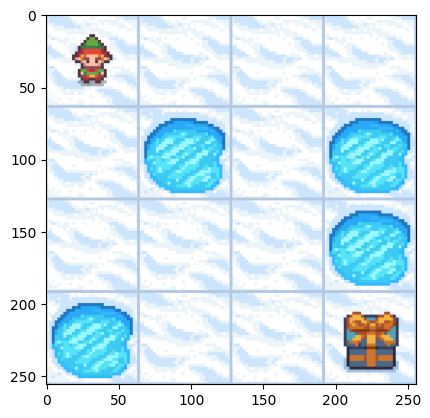

In [29]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = optimal_policy[observation]             # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

#### Policy Iteration Implementation

In [30]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1",is_slippery=True, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
policy = np.random.randint(low=0, high=num_actions, size=num_states)
t=0
# Policy Iteration algorithm
start_time = time.time()
while True:
    t+=1
    while True:
        delta = 0
        for s in range(num_states):

            # Policy evaluation
            v = V[s]
            action = policy[s]
            q_value = 0
            for trans_prob, next_state, reward, done in env.P[s][action]:
                ### START CODE HERE ###
                q_value += trans_prob * (reward + alpha * V[next_state])

                ### END CODE HERE ###
            V[s] = q_value

            delta = max(delta, np.abs(v - V[s]))
        if delta < epsilon:
            break

    policy_stable = True
    for s in range(num_states):

        old_action = policy[s]
        q_values = np.zeros(num_actions)
        # Hint: policy improvement
        ### START CODE HERE ###
        for a in range(num_actions):
          q_value = 0
          for trans_prob, next_state, reward, done in env.P[s][a]:
              q_value += trans_prob * (reward + alpha * V[next_state])
          q_values[a] = q_value



        ### END CODE HERE ###


        # Hint: termination condition. If all old action is equal to new action, the iteration is terminated.
        ### START CODE HERE ###

        best_action = np.argmax(q_values)
        policy[s] = best_action
        if old_action != best_action:
            policy_stable = False
        ### END CODE HERE ###

    if policy_stable:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)
print("Optimal Policy:")
print(policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(V.reshape((4, 4)))

6
0.03286731243133545
Optimal Policy:
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]

Optimal Value Function:
[[0.06886595 0.06139439 0.07439616 0.05578239]
 [0.09183448 0.         0.11220202 0.        ]
 [0.14542171 0.24748821 0.29961202 0.        ]
 [0.         0.37992993 0.63901727 0.        ]]


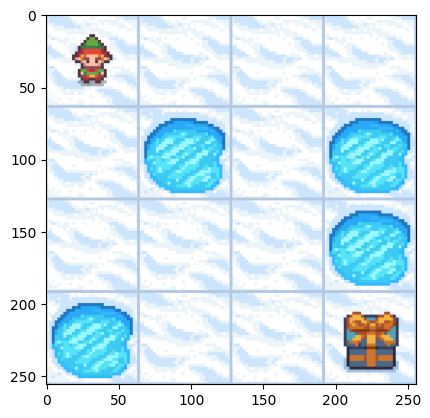

In [31]:
# Evaluate the agent trained by Policy Iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = policy[observation]             # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

#### Analysis:

1. **Iterations and Execution Time:**
   - **Value Iteration:** Required 180 iterations to reach convergence, with each iteration being relatively quick (0.00081 seconds).
   - **Policy Iteration:** Reached convergence much faster, needing only 4 iterations, but each iteration took longer (0.00834 seconds).

2. **Optimal Policy:**
   - Both algorithms produced similar optimal policies, though there were some differences in specific states. For instance, the action chosen in state `[0,2]` differs between the two algorithms.
   - Value Iteration tends to recommend moving **up** (action 3) more often, suggesting a more cautious strategy to handle the environment's unpredictability.

3. **Optimal Value Function:**
   - **Value Iteration:** Generally shows higher values, suggesting a stronger confidence in the expected rewards from each state.
   - **Policy Iteration:** Results in lower values, indicating a more reserved estimation of rewards, likely due to the stochastic nature of the environment.

### Q18
Discuss similarities and differences of the optimal policy in deterministic and stochastic scenarios.

### Answer:


#### Similarities:
- **Objective:** Both policies are designed to safely guide the agent to the goal while avoiding holes, reflecting the shared aim of successfully navigating the Frozen Lake.
- **Movement Direction:** In both deterministic and stochastic settings, the policies generally prioritize moving **right** and **down** since these directions usually bring the agent closer to the goal.

#### Differences:
- **Managing Uncertainty:**
  - **Deterministic Scenario:** The policy assumes precise control over movements, allowing for the shortest, most direct path to the goal without considering potential deviations. This results in a more straightforward and confident approach.
  - **Stochastic Scenario:** Here, the policy considers the risk of unintended movements due to the slippery surface. Consequently, it is more conservative, often opting for safer routes that reduce the likelihood of slipping into holes.

- **Action Preferences:**
  - In the stochastic environment, the policy may include less direct or more cautious actions, such as moving **up** or **left** more frequently, to counteract the uncertainty of movement.
  - The deterministic policy, however, favors the most direct route, given that actions have predictable outcomes.

- **Value Function Variations:**
  - The value function in the stochastic scenario typically shows lower values than in the deterministic one, reflecting the increased risk and lower expected rewards due to the possibility of falling into a hole or missing the goal.

#### Conclusion:
Both policies aim for the same goal, but the deterministic policy is more direct and confident due to the certainty of movement. In contrast, the stochastic policy is more cautious and strategic, accounting for the unpredictability of the environment.

### Q19
Change the map size and randomized locations of holes, and compute the optimal policy.

< Answer Here >

In [32]:
# Define a custom map with a different size and randomized hole locations
custom_map = [
    "SFFFH",
    "FHFHF",
    "FFHFF",
    "HFFHF",
    "FFFHG"
]

# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1", is_slippery=True, desc=custom_map)
alpha = 0.99  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
t=0
start_time = time.time()
while True:
    t+=1
    delta = 0

    # Update the value function for each state
    for s in range(num_states):
        v = V[s]

        # Compute the value for each action in the current state
        q_values = []
        for a in range(num_actions):
            q_value = 0
            for prob, next_state, reward, _ in env.P[s][a]:
                ### START CODE HERE ###
                q_value += prob * (reward + alpha * V[next_state])
                ### END CODE HERE ###
            q_values.append(q_value)

        # Choose the action that maximizes the value
        V[s] = max(q_values)

        # Compute the difference between the new and old value
        delta = max(delta, np.abs(v - V[s]))

    # Check if the value function has converged
    if delta < epsilon:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)

# Obtain the optimal policy
policy = np.zeros(num_states, dtype=int)
for s in range(num_states):

    # Hint: using your value function "V" to choose the action that maximizes the value in the current state
    ### START CODE HERE ###
    q_values = []
    for a in range(num_actions):
        q_value = 0
        for prob, next_state, reward, _ in env.P[s][a]:
            q_value += prob * (reward + alpha * V[next_state])
        q_values.append(q_value)
    policy[s] = np.argmax(q_values)

    ### END CODE HERE ###

optimal_values = V
optimal_policy = policy
print("Optimal Policy:")
print(optimal_policy.reshape((5, 5)))
print("\nOptimal Value Function:")
print(optimal_values.reshape((5, 5)))


33
0.002835533835671165
Optimal Policy:
[[0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 2]
 [0 0 0 0 2]
 [0 0 0 0 0]]

Optimal Value Function:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.23442354]
 [0.         0.         0.         0.15706581 0.47596445]
 [0.         0.         0.         0.         0.73194048]
 [0.         0.         0.         0.         0.        ]]


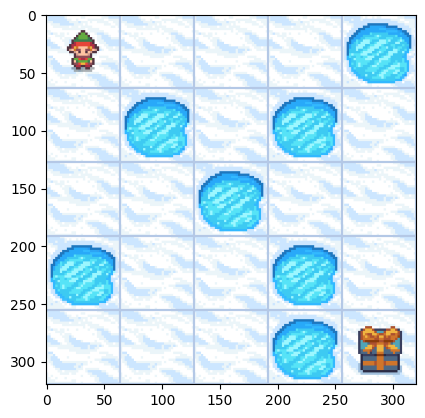

In [33]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True, map_name="4x4",  desc=custom_map)  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = optimal_policy[observation]             # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

### Q20
Suppose that the grid is extremely large with a large number of states. Are there deficiencies with value and policy iteration? Discuss how to obtain the optimal policy?

### Answer:

#### Deficiencies of Value and Policy Iteration:

1. **Computational Complexity:** As the grid size increases, value and policy iteration require significant computational resources, resulting in slower convergence.
2. **Memory Usage:** Large grids demand substantial memory to store all value functions and policies, potentially exceeding available capacity.
3. **Convergence Issues:** In larger grids, especially in stochastic environments, these algorithms may take much longer to converge, making them less practical.

### Approaches to Obtain the Optimal Policy in Large Grids:

**Reinforcement Learning (RL) Techniques:**

1. **Q-Learning:** A model-free algorithm that updates the value of action-state pairs based on the agent's experience, without needing to evaluate every state, making it suitable for large grids.

2. **SARSA:** An on-policy algorithm that updates action values according to the agent's current policy, effectively managing large state spaces.

3. **Deep Reinforcement Learning (DRL):** Utilizes neural networks to approximate Q-values, enabling learning in extensive and complex state spaces, ideal for large, high-dimensional grids.